# Random Walk(Brownian motion)

## 2D random-walk

### Import libs

In [11]:
# For 2D RW, we need to import numpy, matplotlib and scipy.
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

### Initialize some constants

In [12]:
# We create 2000 realizations with 500 steps each
# Variable needed: n_stories, t_max

n_stories = 2000
t_max = 500

# Generate time steps t using np.arange

t = np.arange(t_max)

### Generate random steps

In [28]:
# Steps can be -1 or 1 in either x or y direction

# For 1D case, we used:
# steps = 2 * np.random.randint(0, 2, (n_stories, t_max)) - 1

# For 2D cases, we will generate 2 random matrices with the same size (n_stories, t_max).
# We use the first one for steps as the same way we did in 1D example. 
# This one will determine either the particle goes positive or negtive direction. 1 for positive, -1 for negtive.
# Variable name: steps
steps = 2 * np.random.randint(0, 2, (n_stories, t_max)) - 1


# We use the second one as an indicator to describe either the particle goes x or y direction. We can use 0 for x and 1 for y.
# Variable name: x_or_y

x_or_y = np.random.randint(0, 2, (n_stories, t_max))


# Now we should have two matrices steps and x_or_y. 
# By doing a element-wise multiplication between steps and x_or_y, we should be able to seperate the motion in x and y. 

# For example:
# steps [1,1,-1,-1,1,1,1,-1,1,1]
# x_or_y [0,1,1,0,1,1,1,0,0,0]
# y_position [0,1,-1,0,1,1,1,0,0,0]

# Y motion should be straightfoward, X motion is a bit harder.

print(steps)
print(x_or_y)

[[ 1  1 -1 ... -1 -1  1]
 [ 1 -1 -1 ... -1  1 -1]
 [-1  1 -1 ... -1  1  1]
 ...
 [-1 -1 -1 ...  1 -1  1]
 [-1  1  1 ... -1  1  1]
 [-1 -1 -1 ...  1  1 -1]]
[[0 1 0 ... 1 1 0]
 [0 0 1 ... 1 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 1 0]
 [1 0 0 ... 0 1 1]
 [0 1 0 ... 1 1 1]]


### Calculate the cumulative sum 

In [29]:
# Calculate y_steps and y_positions using np.cumsum
y_steps = steps * x_or_y
y_positions = np.cumsum(y_steps,axis=1)
print(y_positions)

[[  0   1   1 ...  -6  -7  -7]
 [  0   0  -1 ... -21 -21 -22]
 [ -1  -1  -1 ...  13  13  14]
 ...
 [  0   0  -1 ...  23  22  22]
 [ -1  -1  -1 ...   1   2   3]
 [  0  -1  -1 ...  38  39  38]]


In [30]:
# Calculate x_steps and x_positions using np.cumsum
x_steps = steps * (-(x_or_y -1))
x_positions = np.cumsum(x_steps,axis=1)
print(x_positions)

[[ 1  1  0 ... 16 16 17]
 [ 1  0  0 ...  1  2  2]
 [ 0  1  0 ...  7  8  8]
 ...
 [-1 -2 -2 ... 21 21 22]
 [ 0  1  2 ...  5  5  5]
 [-1 -1 -2 ...  6  6  6]]


### Plot a 2D trajectory

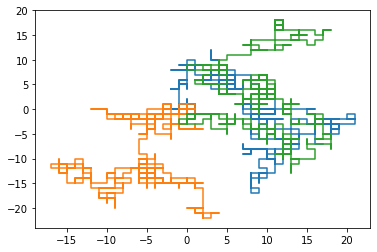

In [39]:
# plot the trajectores of the first 3 particle
plt.plot(x_positions[0],y_positions[0])
plt.plot(x_positions[1],y_positions[1])
plt.plot(x_positions[2],y_positions[2])

### Calculate the mean square distance(MSD)

In [42]:
# Determine the time evolution of the mean square distance.
sq_distance = y_positions**2 + x_positions**2
mean_sq_distance = np.mean(sq_distance, axis=0)

### Plot the data

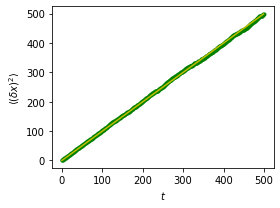

In [43]:
# Plot the distance d from the origin as a function of time and
# compare with the theoretically expected result.
plt.figure(figsize=(4, 3))
plt.plot(t, (mean_sq_distance), 'g.')
plt.plot(t,t,'y-')
plt.xlabel(r"$t$")
plt.ylabel(r"$\langle (\delta x)^2 \rangle$")
plt.tight_layout()


We find a well-known result in physics: the MSD grows linearly as the time!

### Linear fit on data

In [44]:
# with scipy
from scipy import optimize

def diff_fit(X, m, b):
    return m * X + b

In [45]:
params, params_covariance = optimize.curve_fit(diff_fit, t, mean_sq_distance, p0=[1, 1])
print(params)

[0.99110433 3.57992254]


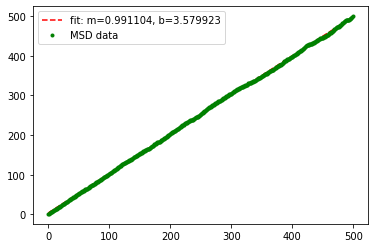

In [46]:
plt.plot(t, diff_fit(t, *params), 'r--', label='fit: m={0:f}, b={1:f}'.format(params[0],params[1]))
plt.plot(t, (mean_sq_distance), 'g.',label='MSD data')
plt.legend()


## More fun

Wall time: 576 ms


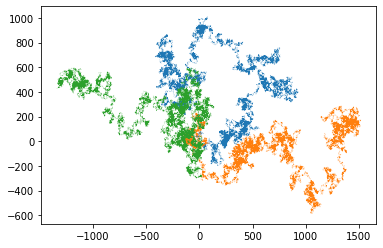

In [56]:
%%time
# longer run with fewer particles
n_stories = 3
t_max = 1000000
t = np.arange(t_max)

steps = 2 * np.random.randint(0, 2, (n_stories, t_max)) - 1
x_or_y = np.random.randint(0, 2, (n_stories, t_max))

y_steps = steps * x_or_y
y_positions = np.cumsum(y_steps,axis=1)

x_steps = steps * (-(x_or_y -1))
x_positions = np.cumsum(x_steps,axis=1)

plt.plot(x_positions[0],y_positions[0],linewidth=0.05)
plt.plot(x_positions[1],y_positions[1],linewidth=0.05)
plt.plot(x_positions[2],y_positions[2],linewidth=0.05)
